In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("OnlineRetail.csv",encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df=df.dropna(subset=['CustomerID'])

In [6]:
df=df.dropna(subset=['Description'])

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
# Remove negative or Zeo Quantity
df=df[df['Quantity']>0]

In [9]:
# Remove  negative and zero unit price
df=df[df['UnitPrice']>0]

In [10]:
# Reset the index after cleaning
df.reset_index(drop=True,inplace=True)

In [11]:
# Create Tota Price Column 
df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [12]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [13]:
# Convert Invoicedate to Datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

 Exploratory Data Analysis

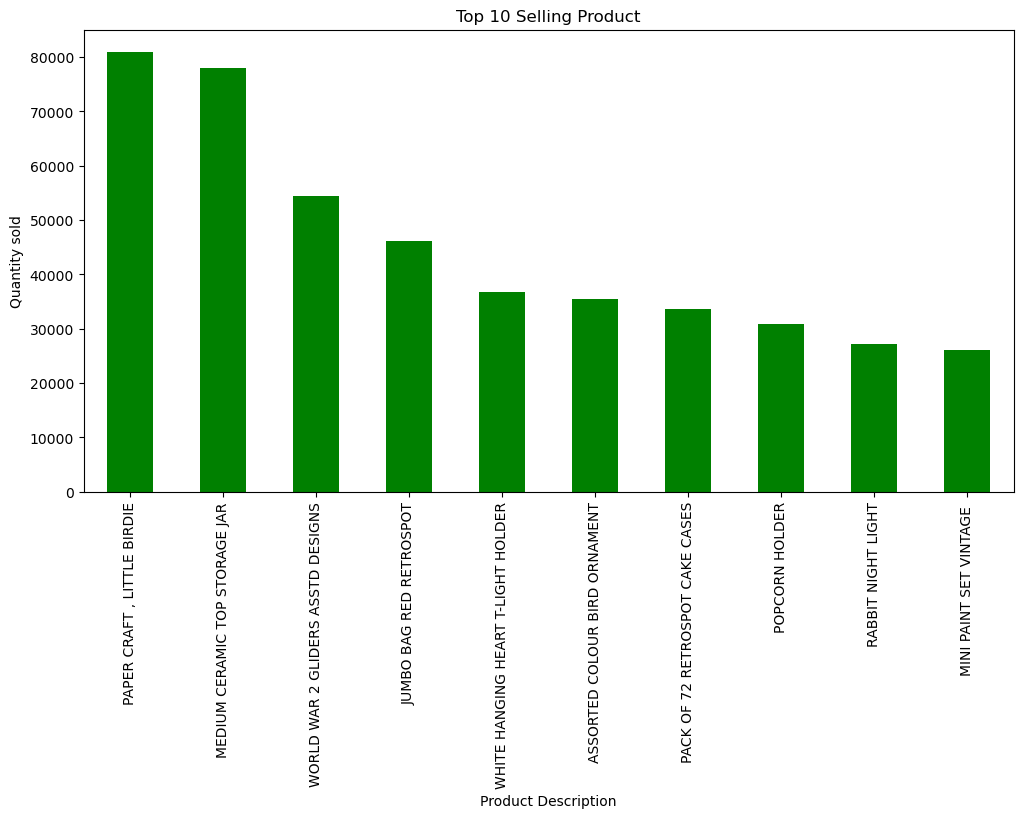

In [14]:
# Top 10 Selling Product
top_product =df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_product.plot(kind='bar',figsize=(12,6),color ='green')
plt.title('Top 10 Selling Product')
plt.xlabel('Product Description')
plt.ylabel('Quantity sold')
plt.xticks(rotation=90)
plt.show()

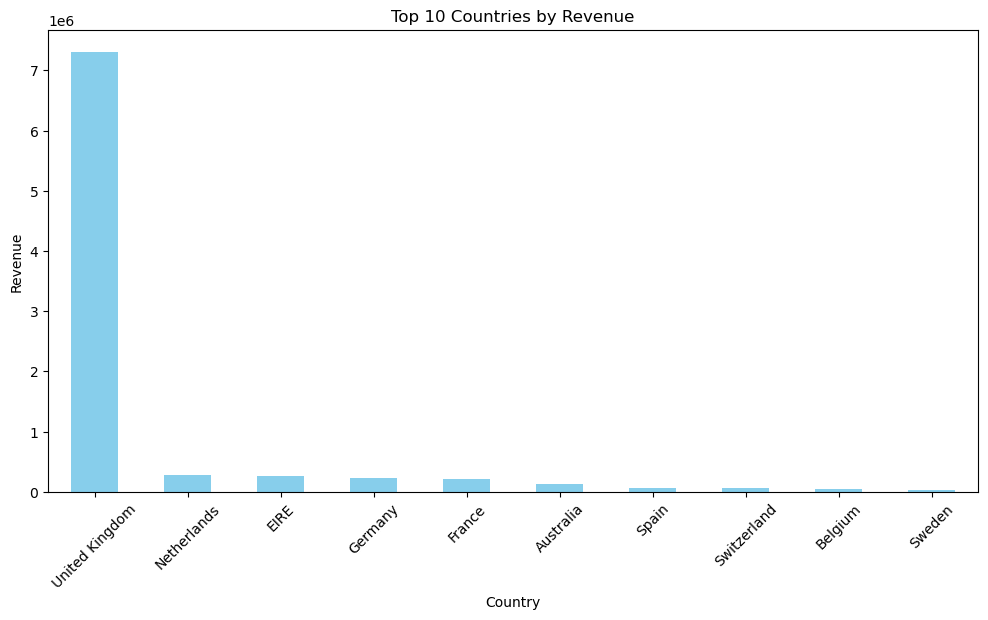

In [15]:
# Top 10 Countries by Revenue
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_revenue.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


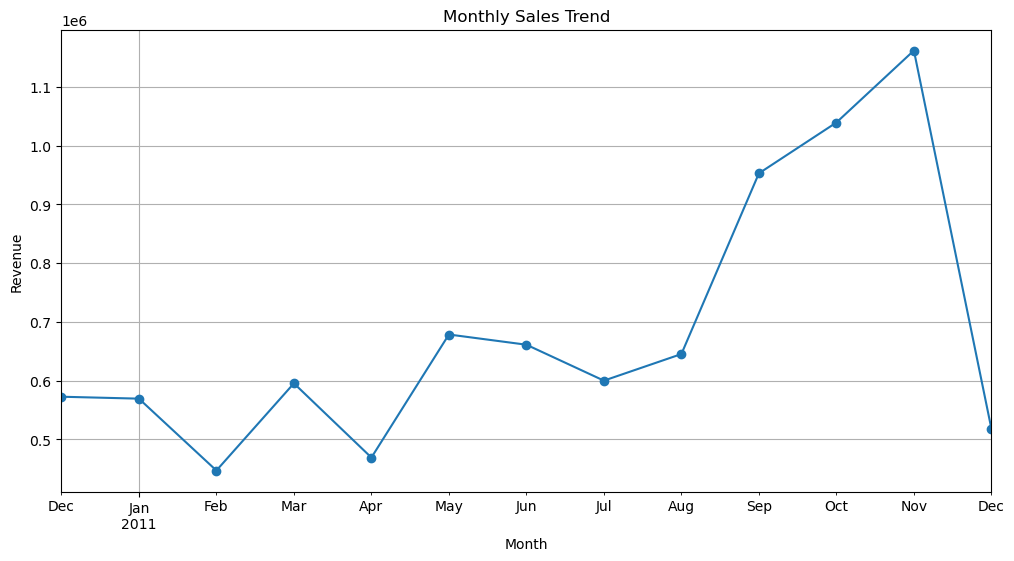

In [16]:
# Monthly Sales Trend
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalPrice'].sum()
monthly_sales.plot(figsize=(12,6), marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid()
plt.show()


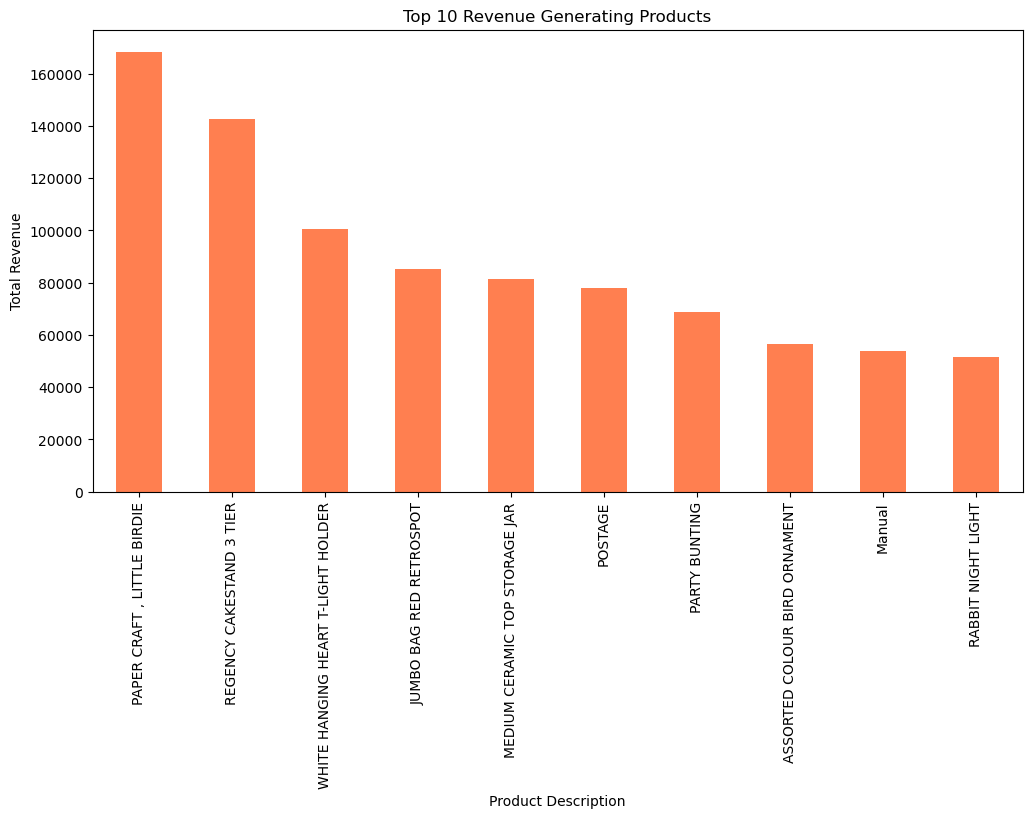

In [17]:
# Top Revenue Generating Products
top_revenue_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_revenue_products.plot(kind='bar', color='coral')
plt.title('Top 10 Revenue Generating Products')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()

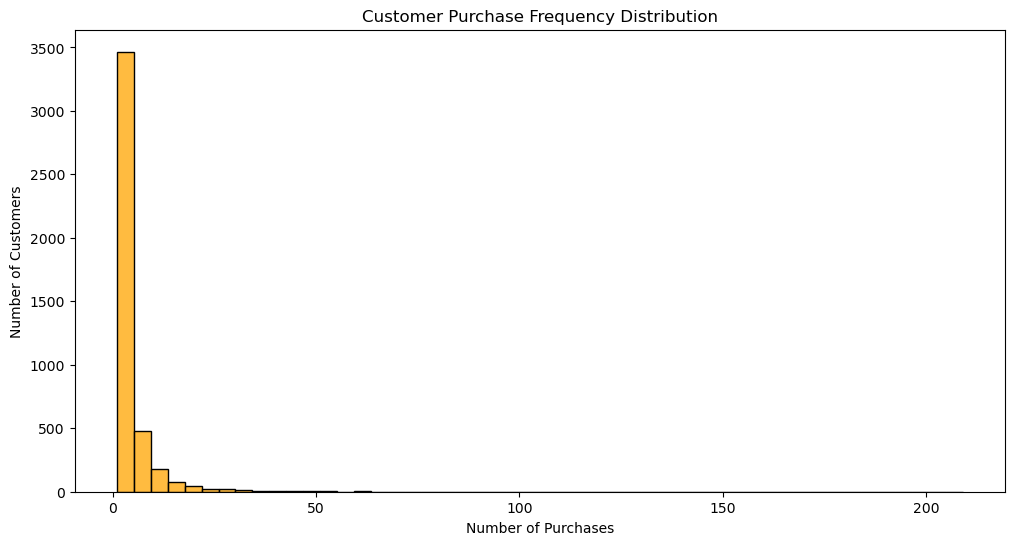

In [18]:
#  Customer Purchase Frequency
customer_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.histplot(customer_frequency, bins=50, color='orange')
plt.title('Customer Purchase Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()


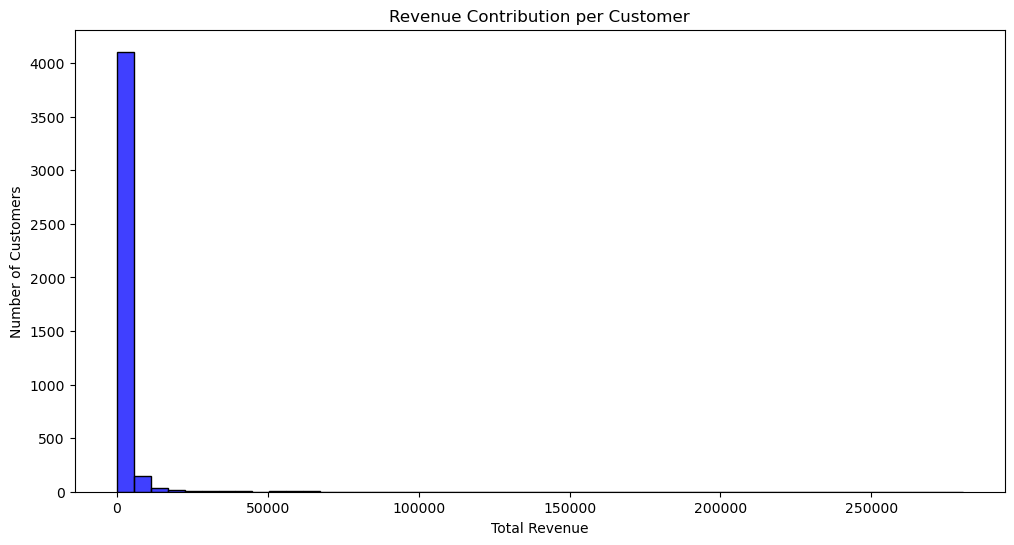

In [19]:
# Revenue Contribution per Customer
customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.histplot(customer_revenue, bins=50, color='blue')
plt.title('Revenue Contribution per Customer')
plt.xlabel('Total Revenue')
plt.ylabel('Number of Customers')
plt.show()


In [20]:
# Set the reference date (for Recency Calculation)
reference_date=df['InvoiceDate'].max() +pd.Timedelta(days=1)

In [21]:
# Calculate RFM Metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  
    'InvoiceNo': 'nunique',  
    'TotalPrice': 'sum' })

In [22]:
# Rename columns for clarity
rfm.rename(columns={'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'}, inplace=True)


In [23]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


RFM Scoring

In [24]:
# Recency: lower is better 
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])

In [25]:
# Frequency : higher is better 
rfm['M_Score']=pd.qcut(rfm['Monetary'],4, labels=[1,2,3,4])

In [26]:
# Frequency: higher is better 
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])

In [27]:
# Combine scores
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

In [28]:
# Define Segments
def segment_customer(df):
    if df['RFM_Score'] >= 9:
        return 'Top Customers'
    elif df['RFM_Score'] >= 7:
        return 'Loyal Customers'
    elif df['RFM_Score'] >= 5:
        return 'Potential Loyalists'
    else:
        return 'At Risk'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [29]:
rfm['Segment'].value_counts()

Segment
Top Customers          1679
Potential Loyalists     988
Loyal Customers         864
At Risk                 807
Name: count, dtype: int64

C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_6432\1579147558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')


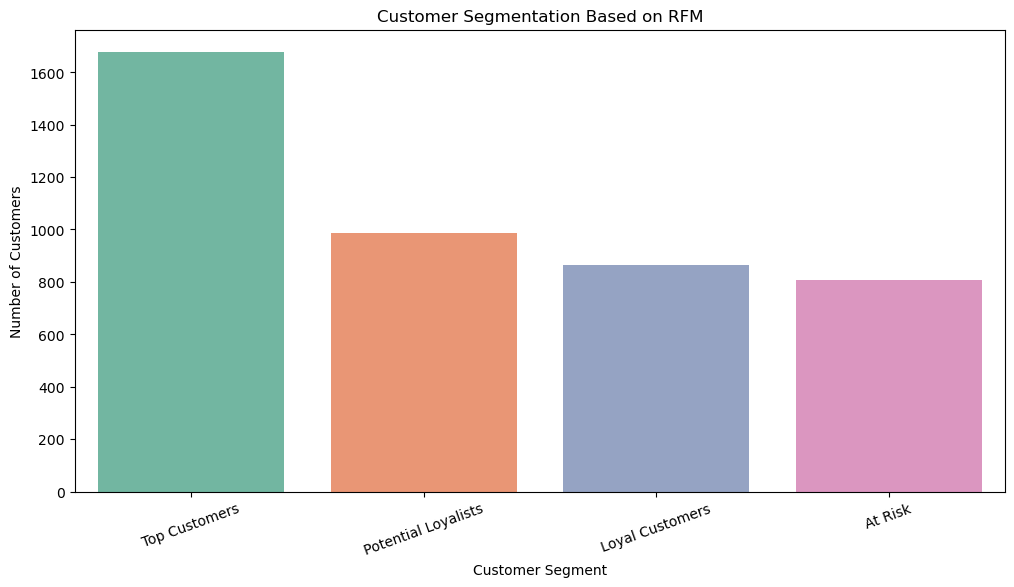

In [30]:
#  Visualize Customer Segments
plt.figure(figsize=(12,6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')
plt.title('Customer Segmentation Based on RFM')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=20)
plt.show()


In [31]:
#  Export RFM results to CSV
rfm.to_csv('RFM_Segmentation.csv')


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [33]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'})

rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'}, inplace=True)


In [34]:
# Scaling the data
scaler = StandardScaler()

In [35]:
rfm_scaled = scaler.fit_transform(rfm)

# Convert back to DataFrame for clarity
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])


In [36]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [37]:
# Analyze mean RFM values per cluster
cluster_summary = rfm.groupby('Cluster').mean()
cluster_summary 

,Recency,Frequency,Monetary
Cluster,,,
0,43.702685,3.682711,1359.049284
1,248.075914,1.552015,480.617480
2,7.384615,82.538462,127338.313846
3,15.500000,22.333333,12709.090490


C:\Users\Lalit Karki\AppData\Local\Temp\ipykernel_6432\2912579524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Cluster', palette='Set3')


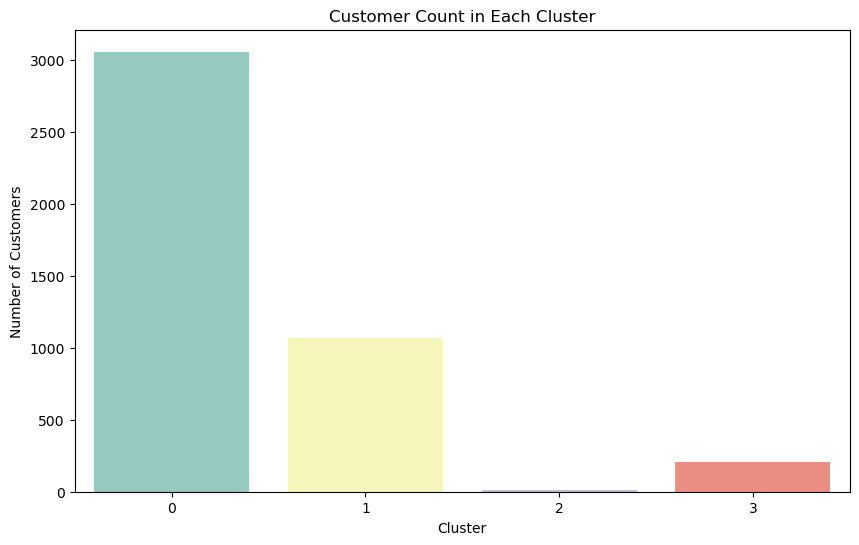

In [38]:
# Visualize Cluster Sizes
plt.figure(figsize=(10,6))
sns.countplot(data=rfm, x='Cluster', palette='Set3')
plt.title('Customer Count in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [39]:
# Reduce dimensions for visualization
pca = PCA(2)
pca_components = pca.fit_transform(rfm_scaled)

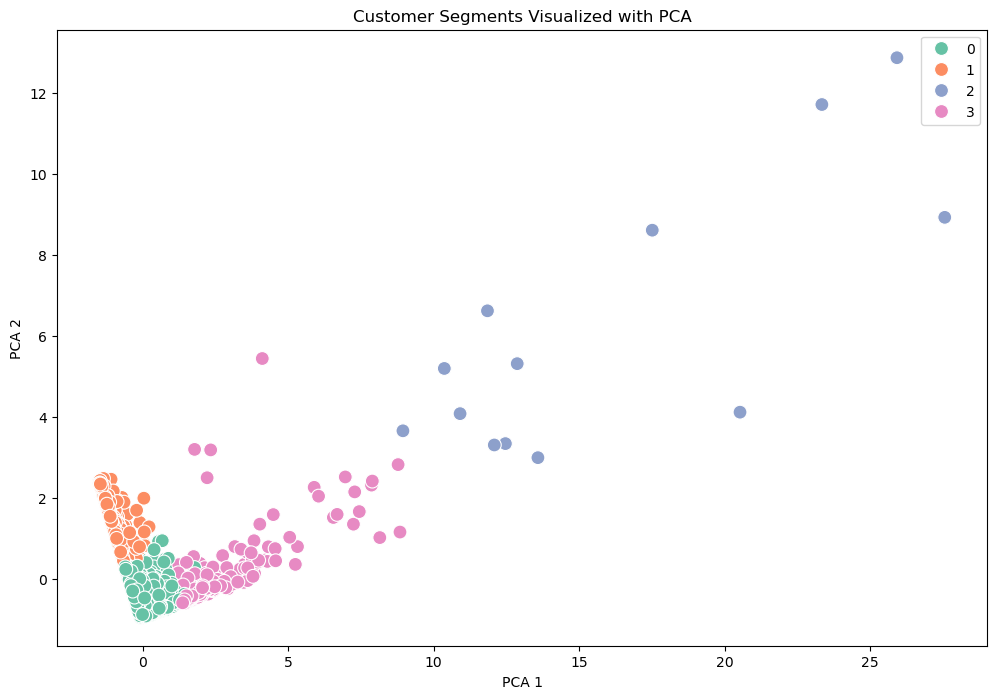

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=rfm['Cluster'], palette='Set2', s=100)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()